Saving selected_features .txt to selected_features  (1).txt


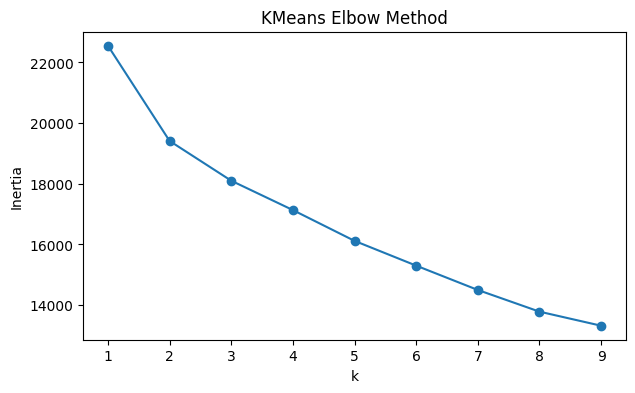

KMeans vs true labels crosstab:
 thalassemia_Reversable Defect  False  True 
row_0                                      
0                                164    294
1                                451    116
ARI: 0.20470917204961156
NMI: 0.14884971111842388


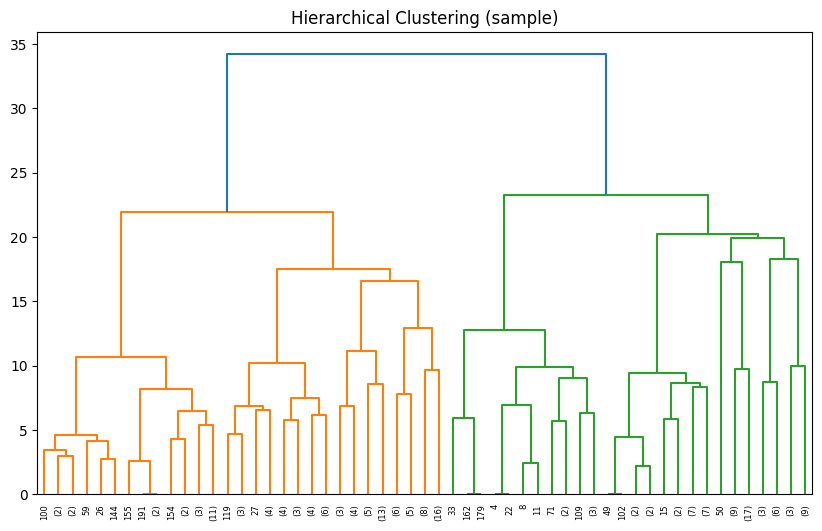

Agg vs true labels crosstab:
 thalassemia_Reversable Defect  False  True 
row_0                                      
0                                221    246
1                                394    164
ARI (agg): 0.06072196396880946
NMI (agg): 0.0413599137027799


In [4]:

# Requires: cleaned_heart_disease.csv and selected_features.txt

import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

#  Load Data
DATA_CLEAN = "cleaned_heart_disease.csv"
assert os.path.exists(DATA_CLEAN), "Run preprocessing first!"
df = pd.read_csv(DATA_CLEAN)

# Identify target column
target_col = df.columns[-1]
y = df[target_col]

#  Encode categorical features
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    if col != target_col:
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])


#Load selected features
from google.colab import files
uploaded = files.upload()

sel_path = "selected_features.txt"


#  Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 1) KMeans Clustering

inertias = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

# Plot elbow curve
plt.figure(figsize=(7, 4))
plt.plot(list(k_range), inertias, '-o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('KMeans Elbow Method')
plt.show()

# Choose k=2 (disease vs no disease)
k = 2
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels_k = kmeans.fit_predict(X_scaled)

# Compare clusters with true labels
print("KMeans vs true labels crosstab:\n", pd.crosstab(labels_k, y))
print("ARI:", adjusted_rand_score(y, labels_k))
print("NMI:", normalized_mutual_info_score(y, labels_k))


# 2) Hierarchical Clustering

sample = X_scaled[np.random.choice(X_scaled.shape[0],
                                   size=min(200, X_scaled.shape[0]),
                                   replace=False)]

Z = linkage(sample, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering (sample)')
plt.show()

agg = AgglomerativeClustering(n_clusters=k)
labels_agg = agg.fit_predict(X_scaled)
print("Agg vs true labels crosstab:\n", pd.crosstab(labels_agg, y))
print("ARI (agg):", adjusted_rand_score(y, labels_agg))
print("NMI (agg):", normalized_mutual_info_score(y, labels_agg))
